## Explore Ekman Upwelling Index

In [1]:
## import packages
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.patches as mpatches
import matplotlib
import cartopy.crs as ccrs
import glob
import os
import my_functions
import datetime
import statsmodels.api as sm
%matplotlib inline

In [2]:
## import data
os.chdir('/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/')
MTSS = xr.open_dataset('MTSS_weekly.nc')
# UI_SST = UI_SST = xr.open_dataset('UI_SST.nc')
LSM = xr.open_dataset('Land_sea_mask.nc')
# SSH = xr.open_dataset('SSH_weekly.nc') # SSH IBI
# mid-shelf coordinates
mid_shelf_lat = np.genfromtxt('CoRTAD/lat_midshelf_CoRTAD.dat')[:,1]
mid_shelf_lon = np.genfromtxt('CoRTAD/lon_midshelf_CoRTAD.dat')[:,1]

In [3]:
## preprocessing steps
# add the land sea mask to the MTSS dataset
MTSS['lsm'] = LSM.lsm

# calculate upwelling index from wind stress dataset -> use my upwelling function (from my_functions.py)
UI_Ek = my_functions.calc_upwelling_index(MTSS, MTSS.lat, MTSS.lon, MTSS.metss, MTSS.mntss)
# SSH upwelling index
# first mid-shelf
# SSH = my_functions.add_mid_shelf(SSH, mid_shelf_lat, mid_shelf_lon)
# SSH['UI'] = SSH.zos.where(SSH.lon == -10.5) - SSH.zos.where(SSH.mid_shelf).mean(dim = 'lon')
# SSH.UI.attrs.update({'Name' : 'SSH upwelling index', 'Info' : 'SSH at 10.5°W - SSH at mid-shelf'})

# calculate meridional mean (1D Portuguese upwelling index), does meridional mean of UI by default
UI_Ek = my_functions.calc_meridional_mean(UI_Ek, lon = -10.5) # change to lon -10.5 to match SSH slected location (made this decision together wiht Joaquim, just seemed a good enough distance away from land)
# UI_SST = my_functions.calc_meridional_mean(UI_SST, lon = -15) # specifying lon does not really matter as it is equal across al lons
# UI_SSH = my_functions.calc_meridional_mean(SSH, lon = -10.5)

# create subset of summer months, June-September (week 22-39), subsets week 22-39 by default (adds weeks and months)
UI_Ek_summer = my_functions.subset_summer(UI_Ek)
# UI_SST_summer = my_functions.subset_summer(UI_SST)
# UI_SSH_summer = my_functions.subset_summer(UI_SSH)

# add mid_shelf
UI_Ek = my_functions.add_mid_shelf(UI_Ek, mid_shelf_lat, mid_shelf_lon)

In [4]:
## Try to create integrated Ekman transport Index...
# maybe integrate UI from shore to 50km off shore (Jing et al. 2022)
# is that an appropriate thing to do??

UI_Ek

<xarray.Dataset> Size: 199MB
Dimensions:       (lat: 41, lon: 61, time: 2201)
Coordinates:
  * lat           (lat) float32 164B 35.0 35.25 35.5 35.75 ... 44.5 44.75 45.0
  * lon           (lon) float32 244B -20.0 -19.75 -19.5 ... -5.5 -5.25 -5.0
  * time          (time) datetime64[ns] 18kB 1981-12-01 ... 2024-01-30
Data variables:
    metss         (time, lat, lon) float32 22MB ...
    mntss         (time, lat, lon) float32 22MB -0.01028 -0.01194 ... 0.009795
    lsm           (lat, lon) bool 3kB ...
    ek_trans_u    (time, lat, lon) float64 44MB -0.1199 -0.1393 ... 0.09266
    ek_trans_v    (time, lat, lon) float64 44MB -0.8584 -0.8329 ... -0.2697
    wind_stress   (time, lat, lon) float32 22MB 0.07431 0.0724 ... 0.03015
    UI            (time, lat, lon) float64 44MB 0.1199 0.1393 ... -0.09266
    UI_mean       (time) float64 18kB 0.9822 0.2677 0.1392 ... -0.1772 -0.6275
    week_of_year  (time) int64 18kB 49 50 51 52 53 1 2 3 ... 50 51 52 1 2 3 4 5
    month         (time) <U32 282kB 'Dec' 'Dec' 'Dec' ... 'Jan' 'Jan' 'Feb'
    mid_shelf     (lat, lon) bool 3kB False False False ... False False False
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-04-16T05:35 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

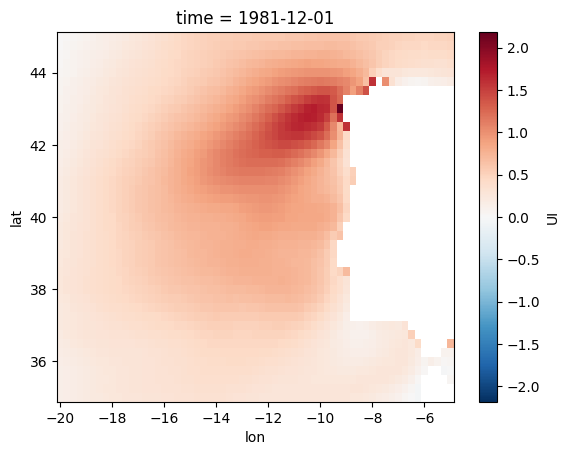

In [5]:
UI_Ek.UI.where(UI_Ek.lsm).isel(time = 0).plot.imshow()

In [6]:
for long in UI_Ek.lon:
    UI_Ek.isel(time = 0).UI.sel(lon = long).where((UI_Ek.lsm.sel(lon = long) + UI_Ek.lsm.sel(lon = (long + 0.25)) == 0.5, drop = True)

SyntaxError: invalid syntax (123600784.py, line 2)

In [ ]:
UI_Ek.lsm.sel(lon = (-12 + 0.25))

In [ ]:
UI_Ek.lsm[0:-1] + UI_Ek.lsm

In [ ]:
test = 0.5 * (UI_Ek.lsm.isel(lon = slice(0, -2)).astype('int').values + UI_Ek.lsm.isel(lon = slice(1, -1)).astype('int').values)

In [ ]:
plt.imshow(test)
plt.colorbar()

In [ ]:
test.max()

In [ ]:
bla = UI_Ek.lsm

In [ ]:
bla